#  EDA & Data Preprocessing on Google App Store Rating Dataset

* Objective:


           The Goal is to explore the data and pre-process it for future use in any predictive analytics study.

# 1. Import required libraries and read the dataset. (2 marks) 

In [1]:
import pandas as p
import numpy as n
import matplotlib.pyplot as pl
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns

# 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features. (2 marks) 


In [2]:
data=p.read_csv("Apps_data.csv")
app=data.copy()

In [3]:
app.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
app.shape

(10841, 13)

In [5]:
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


* In this app_dataset there are 10841 rows and 13 columns

*  It consist of one numerical float variable data column and 12 different object categorical column

* These 12 categorical columns are to be treated and cleaned during the below process

# 3. Check summary statistics of the dataset. List out the columns that need to be worked upon for model building. (2 marks) 

In [6]:
app.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
App,10841,9660,ROBLOX,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category,10841,34,FAMILY,1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rating,9367.0,NaN,NaN,NaN,4.193338,0.537431,1.0,4.0,4.3,4.5,19.0
Reviews,10841,6002,0,596,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Size,10841,462,Varies with device,1695,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Installs,10841,22,"1,000,000+",1579,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,10840,3,Free,10039,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,10841,93,0,10040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Content Rating,10840,6,Everyone,8714,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Genres,10841,120,Tools,842,NaN,NaN,NaN,NaN,NaN,NaN,NaN


*  INFERENCE
            
            1. Except the Rating column all  looks to be the categorical variables. the maximum Rating is 19 and the minumum is 1
            2. the standard Deviation for the Rating column is 0.537

# 4. Check if there are any duplicate records in the dataset? if any drop them.

In [7]:
app.duplicated().value_counts()

False    10358
True       483
dtype: int64

* there are 483 duplicates values in the records need to be treated

* The remaining 10358 are original or unique data values

In [8]:
# DROPPING THE DUPLICATES
app.drop_duplicates(inplace=True)

In [9]:
app.duplicated().value_counts()

False    10358
dtype: int64

In [10]:
app.shape

(10358, 13)

* After dropping the duplicates the row number is reduced to 10358 thereby changing the shape of the entire dataset

# 5. Check the unique categories of the column 'Category', Is there any invalid category? If yes, drop them

In [11]:
app['Category'].value_counts()

FAMILY                 1943
GAME                   1121
TOOLS                   843
BUSINESS                427
MEDICAL                 408
PRODUCTIVITY            407
PERSONALIZATION         388
LIFESTYLE               373
COMMUNICATION           366
FINANCE                 360
SPORTS                  351
PHOTOGRAPHY             322
HEALTH_AND_FITNESS      306
SOCIAL                  280
NEWS_AND_MAGAZINES      264
TRAVEL_AND_LOCAL        237
BOOKS_AND_REFERENCE     230
SHOPPING                224
DATING                  196
VIDEO_PLAYERS           175
MAPS_AND_NAVIGATION     137
EDUCATION               130
FOOD_AND_DRINK          124
ENTERTAINMENT           111
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
HOUSE_AND_HOME           80
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

* there is an invalid category of  '1.9'  is present in the last column with a value count of   '1'
       
 * It need to be treated and removed from the entire dataset which is not a string value and remain in only one place.




In [12]:
app = app[app['Category'] != '1.9']


In [13]:
app['Category'].value_counts()

FAMILY                 1943
GAME                   1121
TOOLS                   843
BUSINESS                427
MEDICAL                 408
PRODUCTIVITY            407
PERSONALIZATION         388
LIFESTYLE               373
COMMUNICATION           366
FINANCE                 360
SPORTS                  351
PHOTOGRAPHY             322
HEALTH_AND_FITNESS      306
SOCIAL                  280
NEWS_AND_MAGAZINES      264
TRAVEL_AND_LOCAL        237
BOOKS_AND_REFERENCE     230
SHOPPING                224
DATING                  196
VIDEO_PLAYERS           175
MAPS_AND_NAVIGATION     137
EDUCATION               130
FOOD_AND_DRINK          124
ENTERTAINMENT           111
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
HOUSE_AND_HOME           80
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: Category, dtype: int64


* Here the unused category or invalid category is removed successfully 
* All other variables are useful or valid data in the given Category column



In [14]:
app.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10357 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10357 non-null  object 
 1   Category        10357 non-null  object 
 2   Rating          8892 non-null   float64
 3   Reviews         10357 non-null  object 
 4   Size            10357 non-null  object 
 5   Installs        10357 non-null  object 
 6   Type            10356 non-null  object 
 7   Price           10357 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10357 non-null  object 
 10  Last Updated    10357 non-null  object 
 11  Current Ver     10349 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


# 6. Check if there are missing values present in the column Rating, If any? drop them and and create a newcolumn as 'Rating_category' by converting ratings to high and low categories(>3.5 is high rest low)

In [15]:
# Checking for missing value in the Column Rating
app['Rating'].isnull().value_counts()

False    8892
True     1465
Name: Rating, dtype: int64

* There are 1465  missing values or null values are present in the dataset which are to be treated
* here I assessed it to remove those values from the column


In [16]:
app= app.dropna(subset=['Rating'])


In [17]:
app['Rating'].isna().value_counts()

False    8892
Name: Rating, dtype: int64

In [18]:
def rating(rate):
    if rate > 3.5:
        return 'high'
    else:
        return 'low'

app['Rating_category'] = app['Rating'].apply(rating)


* New "Rating category" column has been created succefully using the above condition as 'High' and 'Low'



# 7. Check the distribution of the newly created column 'Rating_category' and comment on the distribution.

In [19]:
app['Rating_category'].value_counts()

high    8012
low      880
Name: Rating_category, dtype: int64

* 1.There are 8012 high ratings(>3.5)present in the Ratings column  which is newly created


  2.There are 880 low ratings(<3.5) present in the ratings column which is newly created



# 8. Convert the column "Reviews'' to numeric data type and check the presence of outliers in the column and handle the outliers using a transformation approach.(Hint: Use log transformation) 

In [20]:
app['Reviews'].value_counts()

2          82
3          76
5          74
4          74
1          67
           ..
3157936     1
527247      1
240475      1
5282558     1
398307      1
Name: Reviews, Length: 5992, dtype: int64

In [21]:
app['Reviews'] = p.to_numeric(app['Reviews'])
app['Reviews']

0           159
1           967
2         87510
3        215644
4           967
          ...  
10834         7
10836        38
10837         4
10839       114
10840    398307
Name: Reviews, Length: 8892, dtype: int64

* Now the entire column of REVIEWS has been converted to numerical column

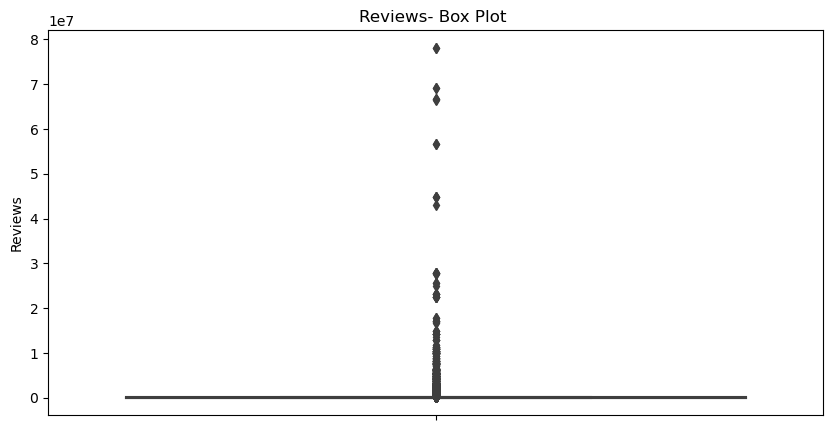

In [22]:
pl.figure(figsize=(10,5))
sns.boxplot(y=app['Reviews'])
pl.title("Reviews- Box Plot ")
pl.show()

In [23]:
Q1 = app['Reviews'].quantile(0.25)
Q3 = app['Reviews'].quantile(0.75)
IQR = Q3 - Q1

IQR_threshold = 1.5

outliers_low = app['Reviews'] < (Q1 - IQR_threshold * IQR)
outliers_high = app['Reviews'] > (Q3 + IQR_threshold * IQR)

#log transformation

app.loc[outliers_low, 'Reviews'] = n.log1p(app.loc[outliers_low, 'Reviews'])
app.loc[outliers_high, 'Reviews'] = n.log1p(app.loc[outliers_high, 'Reviews'])

outliers = app[outliers_low | outliers_high]

if outliers.empty:
    print('No outliers present')
else:
    print("Total Outliers in Review column are :",len(outliers))

Total Outliers in Review column are : 1555


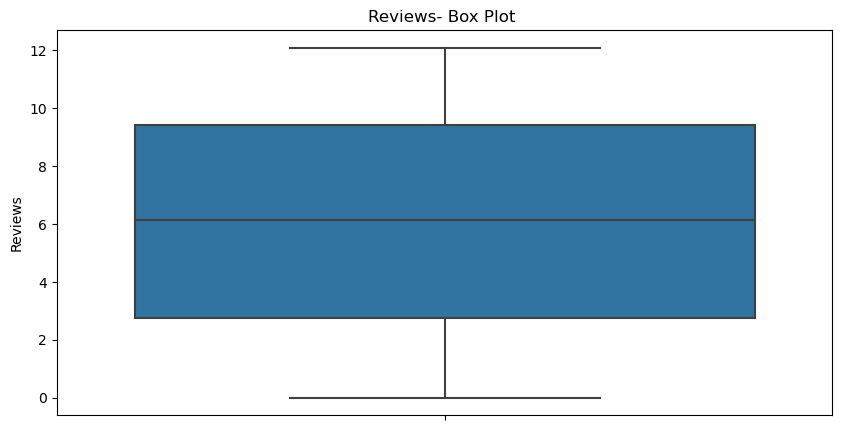

In [24]:
# CAPPED BOX PLOT

pl.figure(figsize=(10,5))
sns.boxplot(y=n.log(app['Reviews']))
pl.title("Reviews- Box Plot ")
pl.show()

* The outliers are successfully treated and hence there are capped successfully among the upper and lower Quartile Range values

# 9. The column 'Size' contains alphanumeric values, treat the non numeric data and convert the column into suitable data type. (hint: Replace M with 1 million and K with 1 thousand, and drop the entries where size='Varies with device')

In [25]:
app['Size'].value_counts()

Varies with device    1468
14M                    154
13M                    152
12M                    151
11M                    150
                      ... 
383k                     1
454k                     1
812k                     1
442k                     1
619k                     1
Name: Size, Length: 414, dtype: int64

In [26]:
app['Size'] = app['Size'].replace({'M':'1e6','K':'1e3','Varies with device':'NaN'}, regex=True)
app['Size'] = p.to_numeric(app['Size'], errors="coerce")
app["Size"]= app["Size"].dropna()
app= app.dropna(subset = ['Size'])


In [27]:
app['Size'].head()

0    191000000.0
1    141000000.0
2      8710000.0
3    251000000.0
4      2810000.0
Name: Size, dtype: float64

* After treatment the entire dataset is converted into float datatype

# 10. Check the column 'Installs', treat the unwanted characters and convert the column into a suitable data type.

In [28]:
app['Installs'].unique()





array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000+', '500,000,000+', '100+', '500+', '10+', '1,000,000,000+',
       '5+', '50+', '1+'], dtype=object)

In [29]:
app['Installs'] = app['Installs'].str.replace("[+,]","")
app['Installs'].head()

0       10000
1      500000
2     5000000
3    50000000
4      100000
Name: Installs, dtype: object

In [30]:
app['Installs']=app['Installs'].astype(int)


In [31]:
app['Installs'].info()

<class 'pandas.core.series.Series'>
Int64Index: 7167 entries, 0 to 10840
Series name: Installs
Non-Null Count  Dtype
--------------  -----
7167 non-null   int32
dtypes: int32(1)
memory usage: 84.0 KB


* from the INSTALL column the special characters are succesfully removed and it is cleaned

# 11. Check the column 'Price' , remove the unwanted characters and convert the column into a suitable data type.

In [32]:
app['Price'].unique()

array(['0', '$4.99', '$6.99', '$7.99', '$3.99', '$5.99', '$2.99', '$1.99',
       '$9.99', '$0.99', '$9.00', '$5.49', '$10.00', '$24.99', '$11.99',
       '$79.99', '$16.99', '$14.99', '$29.99', '$12.99', '$3.49', '$7.49',
       '$1.50', '$19.99', '$15.99', '$33.99', '$39.99', '$2.49', '$4.49',
       '$1.70', '$1.49', '$3.88', '$399.99', '$17.99', '$400.00', '$3.02',
       '$1.76', '$4.84', '$4.77', '$1.61', '$1.59', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00',
       '$3.08', '$2.59', '$19.40', '$15.46', '$8.99', '$3.04', '$13.99',
       '$4.29', '$3.28', '$4.60', '$1.00', '$10.99', '$2.90', '$1.97',
       '$2.56', '$1.20'], dtype=object)

In [33]:

app['Price'] = app['Price'].str.replace('[$,]','')
app['Price'].astype(float)

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
10830    0.0
10834    0.0
10836    0.0
10837    0.0
10840    0.0
Name: Price, Length: 7167, dtype: float64

In [34]:
app["Price"]=app['Price'].astype(float)

# 12. Drop the columns which you think redundant for the analysis.(suggestion: drop column 'rating', since we created a new feature from it (i.e. rating_category) and the columns 'App', 'Rating' ,'Genres','Last Updated', 'Current Ver','Android Ver' columns since which are redundant for our analysis)

In [35]:
Drops = ['App','Rating','Genres','Last Updated','Current Ver','Android Ver']
app = app.drop(columns = Drops)
app.head()

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category
0,ART_AND_DESIGN,159.000000,191000000.0,10000,Free,0.0,Everyone,high
1,ART_AND_DESIGN,967.000000,141000000.0,500000,Free,0.0,Everyone,high
2,ART_AND_DESIGN,87510.000000,8710000.0,5000000,Free,0.0,Everyone,high
3,ART_AND_DESIGN,12.281389,251000000.0,50000000,Free,0.0,Teen,high
4,ART_AND_DESIGN,967.000000,2810000.0,100000,Free,0.0,Everyone,high


* The dropped columns are not necessary to do analysis. so, in the basic step of cleaning the data they are successfully removed from the dataset

# 13. Encode the categorical columns.

In [36]:
print("1. Categorical values in  Content Rating column are:\n",app['Content Rating'].value_counts())

print("\n\n 2. categorical values in Type column are:\n",app['Type'].value_counts())

print("\n\n 3. categorical values in Rating_category column are:\n",app['Rating_category'].value_counts())
    
print("\n\n 4. categorical values in Category column are:\n",app['Category'].value_counts())

1. Categorical values in  Content Rating column are:
 Everyone           5709
Teen                826
Mature 17+          331
Everyone 10+        298
Adults only 18+       2
Unrated               1
Name: Content Rating, dtype: int64


 2. categorical values in Type column are:
 Free    6670
Paid     497
Name: Type, dtype: int64


 3. categorical values in Rating_category column are:
 high    6385
low      782
Name: Rating_category, dtype: int64


 4. categorical values in Category column are:
 FAMILY                 1569
GAME                    956
TOOLS                   564
LIFESTYLE               265
MEDICAL                 264
FINANCE                 257
PERSONALIZATION         255
SPORTS                  231
PHOTOGRAPHY             223
BUSINESS                217
PRODUCTIVITY            214
HEALTH_AND_FITNESS      196
COMMUNICATION           181
SOCIAL                  168
NEWS_AND_MAGAZINES      160
SHOPPING                153
TRAVEL_AND_LOCAL        146
DATING                  1

In [37]:
# assigning dummies 
app= p.get_dummies(app,columns=['Category'],prefix = 'Category')
app= p.get_dummies(app,columns=['Type'],prefix = 'Type')
app= p.get_dummies(app,columns=['Content Rating'],prefix = 'Content Rating')
app= p.get_dummies(app,columns=['Rating_category'],prefix = 'Rating_category')



In [38]:
app.head()

,Reviews,Size,Installs,Price,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,...,Type_Free,Type_Paid,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated,Rating_category_high,Rating_category_low
0,159.000000,191000000.0,10000,0.0,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1,967.000000,141000000.0,500000,0.0,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
2,87510.000000,8710000.0,5000000,0.0,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
3,12.281389,251000000.0,50000000,0.0,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
4,967.000000,2810000.0,100000,0.0,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0


* These Categorical Columns are encoded based on their levels of each and individual column

* Now they can be used in modelling as it is defined by the numerical values of "0" & "1" which is done by using the one-heart encoding

# 14. Segregate the target and independent features (Hint: Use Rating_category as the target)

In [39]:
# INDEPENDENT  VARIABLE
x=app.drop(["Rating_category_high","Rating_category_low"], axis=1)


## TARGET VARIABLE
y= app[["Rating_category_high","Rating_category_low"]]

In [40]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7167 entries, 0 to 10840
Data columns (total 45 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Reviews                         7167 non-null   float64
 1   Size                            7167 non-null   float64
 2   Installs                        7167 non-null   int32  
 3   Price                           7167 non-null   float64
 4   Category_ART_AND_DESIGN         7167 non-null   uint8  
 5   Category_AUTO_AND_VEHICLES      7167 non-null   uint8  
 6   Category_BEAUTY                 7167 non-null   uint8  
 7   Category_BOOKS_AND_REFERENCE    7167 non-null   uint8  
 8   Category_BUSINESS               7167 non-null   uint8  
 9   Category_COMICS                 7167 non-null   uint8  
 10  Category_COMMUNICATION          7167 non-null   uint8  
 11  Category_DATING                 7167 non-null   uint8  
 12  Category_EDUCATION              7

# 15. Split the dataset into train and test.

In [41]:
app["Price"]=app["Price"].astype(float)

In [42]:
from sklearn.model_selection import train_test_split



X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30 , random_state=1)

In [43]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5016 entries, 4007 to 7917
Data columns (total 45 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Reviews                         5016 non-null   float64
 1   Size                            5016 non-null   float64
 2   Installs                        5016 non-null   int32  
 3   Price                           5016 non-null   float64
 4   Category_ART_AND_DESIGN         5016 non-null   uint8  
 5   Category_AUTO_AND_VEHICLES      5016 non-null   uint8  
 6   Category_BEAUTY                 5016 non-null   uint8  
 7   Category_BOOKS_AND_REFERENCE    5016 non-null   uint8  
 8   Category_BUSINESS               5016 non-null   uint8  
 9   Category_COMICS                 5016 non-null   uint8  
 10  Category_COMMUNICATION          5016 non-null   uint8  
 11  Category_DATING                 5016 non-null   uint8  
 12  Category_EDUCATION             

# 16. Standardize the data, so that the values are within a particular range.


In [44]:
from sklearn.preprocessing import StandardScaler



from scipy.stats import stats
from scipy.stats import zscore

In [45]:
X_train_scaled= stats.zscore(X_train)
X_test_scaled=stats.zscore(X_test) 
y_train_scaled= stats.zscore(y_train)
y_test_scaled=stats.zscore(y_test) 


In [46]:
print("X_train scaled:\n", X_train_scaled )
print("\n\ny_train scaled:\n", y_train_scaled)


X_train scaled:
         Reviews      Size  Installs    Price  Category_ART_AND_DESIGN  \
4007  -0.207500 -0.235683 -0.157619 -0.06528                -0.095145   
5556  -0.454896  2.393688 -0.180436 -0.06528                -0.095145   
1179   0.558435 -0.355200 -0.157619 -0.06528                -0.095145   
8405   0.625337  0.481418 -0.157619 -0.06528                -0.095145   
10206  1.896492 -0.859919 -0.157619 -0.06528                -0.095145   
...         ...       ...       ...      ...                      ...   
1538  -0.452528 -0.395039 -0.180436 -0.06528                -0.095145   
7955  -0.441485 -0.076327 -0.178362 -0.06528                -0.095145   
6083   1.899875  0.083029 -0.157619 -0.06528                -0.095145   
350    0.678519 -0.850756 -0.065428 -0.06528                -0.095145   
7917  -0.431765 -0.851155 -0.179514 -0.06528                -0.095145   

       Category_AUTO_AND_VEHICLES  Category_BEAUTY  \
4007                    -0.095145        -0.073566  

* Previous dataset are on their own and different scale from each other
* Now ,With the help of z score method we have converted the entire data into same scale.
* Now, the app_data can be used in MODELLING AND ANALYSIS  which is the ultimate aim to analyse the dataset.